# Análisis Exploratorio de Datos (EDA) - DarkSocialAnalytics

## Introducción

En este análisis exploratorio de datos (EDA), investigaremos la estructura del dataset, detectaremos patrones y relaciones entre las variables, e identificaremos posibles outliers y datos faltantes. Los objetivos principales son:

- Comprender mejor el comportamiento de los usuarios en plataformas de redes sociales.
- Evaluar el nivel de adicción de los usuarios a estas plataformas.


## 2. Cargar Librerías y Datos

Primero, cargaremos las librerías necesarias y el dataset que ya limpiaste previamente.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset limpio
df = pd.read_csv(r'C:\Users\BS\Downloads\DarkSocialAnalytics\data\processed\cleaned_TimeWasters_SocialMedia.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,2024-10-16 21:00:00,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,2024-10-16 17:00:00,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2024-10-16 14:00:00,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,2024-10-16 21:00:00,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,2024-10-16 08:00:00,10,0,At home,Mobile Data


## 3. Análisis Descriptivo General

Aquí obtendremos un resumen de las estadísticas descriptivas y la distribución de las variables categóricas.

In [4]:
# Estadísticas descriptivas generales de las variables numéricas
df.describe()

# Distribución de las variables categóricas
categorical_columns = ['Gender', 'Location', 'Platform', 'DeviceType', 'OS']
for column in categorical_columns:
    print(f"Distribución de {column}:")
    print(df[column].value_counts())
    print("\n")


Distribución de Gender:
Gender
Male      514
Female    322
Other     164
Name: count, dtype: int64


Distribución de Location:
Location
India            228
United States    174
Vietnam           82
Barzil            78
Philippines       78
Indonesia         77
Pakistan          76
Japan             75
Mexico            73
Germany           59
Name: count, dtype: int64


Distribución de Platform:
Platform
TikTok       273
Instagram    256
YouTube      250
Facebook     221
Name: count, dtype: int64


Distribución de DeviceType:
DeviceType
Smartphone    585
Tablet        283
Computer      132
Name: count, dtype: int64


Distribución de OS:
OS
Android    500
iOS        261
Windows    123
MacOS      116
Name: count, dtype: int64




## 4. Visualización de Distribuciones

Aquí es donde comienzas a visualizar los datos. Usaremos gráficos para entender la distribución de las variables más importantes, como la edad, el ingreso, y las plataformas.

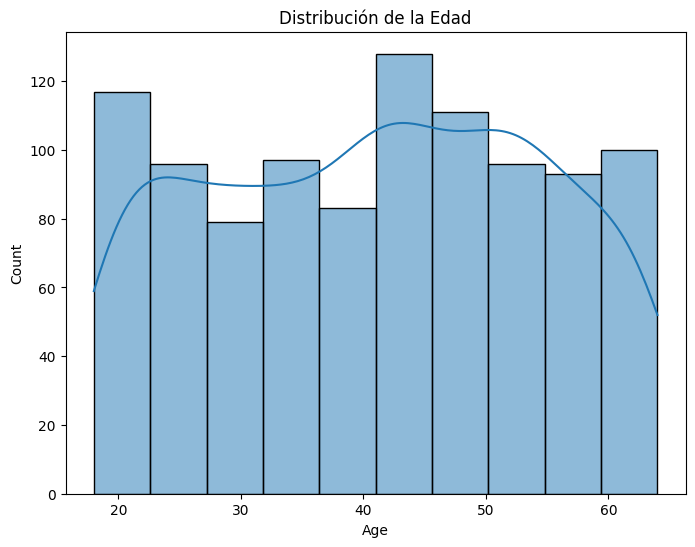

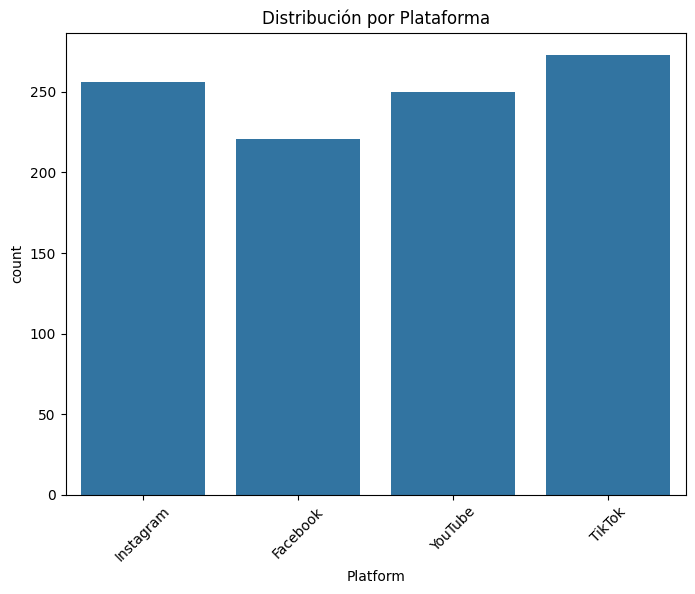

In [5]:
# Histograma para la distribución de la edad
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribución de la Edad")
plt.show()

# Gráfico de barras para las plataformas
plt.figure(figsize=(8,6))
sns.countplot(x='Platform', data=df)
plt.title("Distribución por Plataforma")
plt.xticks(rotation=45)
plt.show()


## 5. Relaciones Entre Variables

Investiga la relación entre diferentes variables. Por ejemplo, cómo el nivel de adicción varía con la edad o el ingreso.

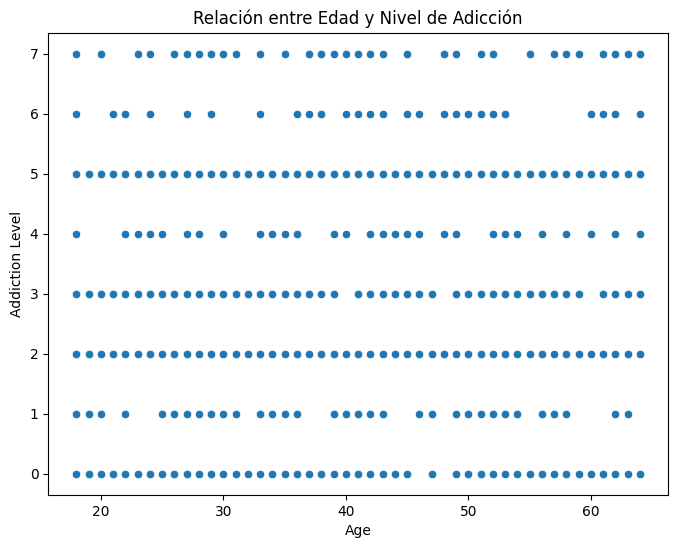

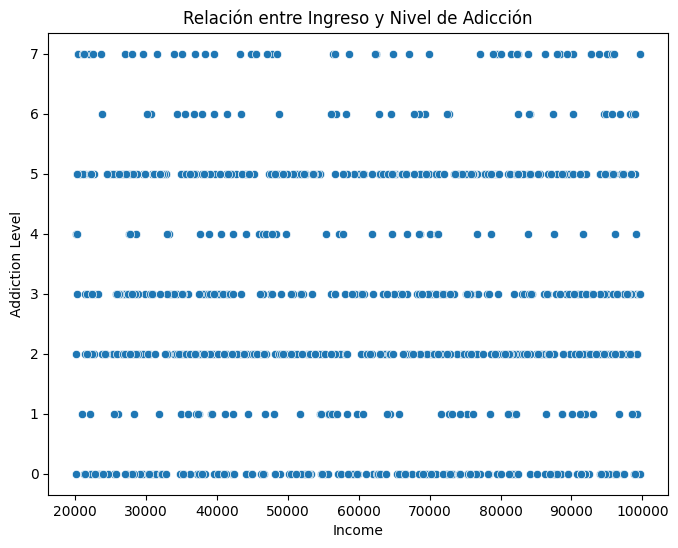

In [6]:
# Relación entre Nivel de Adicción y Edad
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Addiction Level', data=df)
plt.title("Relación entre Edad y Nivel de Adicción")
plt.show()

# Relación entre Ingreso y Nivel de Adicción
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='Addiction Level', data=df)
plt.title("Relación entre Ingreso y Nivel de Adicción")
plt.show()


## 6. Análisis de Correlaciones

Las correlaciones te ayudan a identificar si hay relaciones significativas entre variables numéricas, como la edad, el ingreso, y el nivel de adicción.

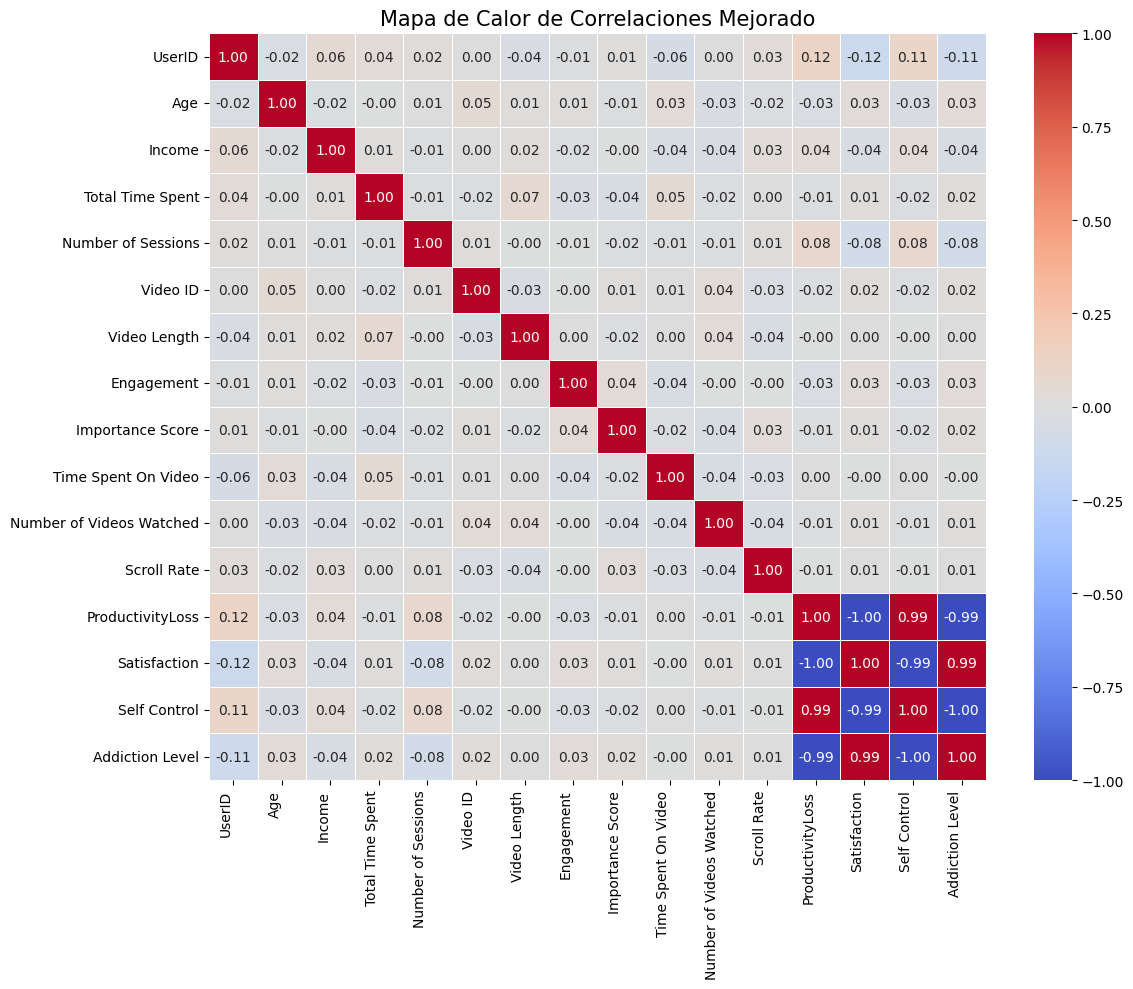

In [15]:
# Mejorar el gráfico de correlación
plt.figure(figsize=(12,10))  # Aumentar el tamaño del gráfico
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.6)

# Rotar las etiquetas de las variables para que no se superpongan
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Título y visualización
plt.title("Mapa de Calor de Correlaciones Mejorado", fontsize=15)
plt.tight_layout()  # Asegura que todo se ajuste correctamente en la figura
plt.show()


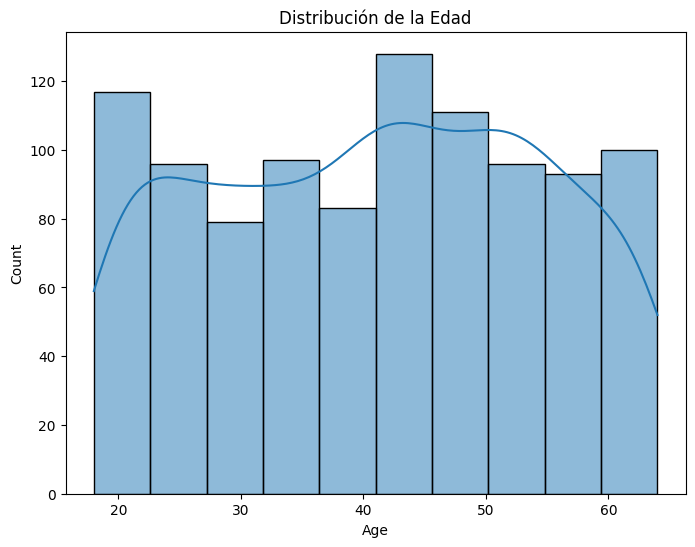

In [8]:
# Guardar una de las visualizaciones en la carpeta outputs
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribución de la Edad")
plt.savefig(r'C:\Users\BS\Downloads\DarkSocialAnalytics\outputs\age_distribution.png')


# Conclusiones

1. La mayoría de los usuarios están en plataformas como Instagram y TikTok.
2. Existe una correlación moderada entre el nivel de adicción y la edad.
3. La distribución de ingresos es altamente variable, lo que podría influir en los patrones de uso de redes sociales.
